In [64]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [70]:
# Load and preview dataset

df_raw = pd.read_csv('/Users/steph/anaconda_projects/apple-health-data/cleaned-data/apl_watch_data_raw.csv')
df_raw.head()

,type,sourceName,unit,value,startDate,endDate,date,month,year,workout_type
0,HKQuantityTypeIdentifierHeartRate,Stephanie’s Apple Watch,count/min,75.0,2024-11-01 18:52:22-07:00,2024-11-01 18:52:22-07:00,2024-11-01,2024-11,2024,HeartRate
1,HKQuantityTypeIdentifierHeartRate,Stephanie’s Apple Watch,count/min,73.0,2024-11-01 18:56:25-07:00,2024-11-01 18:56:25-07:00,2024-11-01,2024-11,2024,HeartRate
2,HKQuantityTypeIdentifierHeartRate,Stephanie’s Apple Watch,count/min,77.0,2024-11-01 19:02:24-07:00,2024-11-01 19:02:24-07:00,2024-11-01,2024-11,2024,HeartRate
3,HKQuantityTypeIdentifierHeartRate,Stephanie’s Apple Watch,count/min,61.0,2024-11-01 19:08:11-07:00,2024-11-01 19:08:11-07:00,2024-11-01,2024-11,2024,HeartRate
4,HKQuantityTypeIdentifierHeartRate,Stephanie’s Apple Watch,count/min,64.0,2024-11-01 19:11:48-07:00,2024-11-01 19:11:48-07:00,2024-11-01,2024-11,2024,HeartRate


In [72]:
# Summarize all columns and metadata 

def summarize_metadata(df):
    summary = pd.DataFrame({
        'dtype': df.dtypes,
        'nulls': df.isnull().sum(),
        'unique_values': df.nunique(),
        'sample_values': df.apply(lambda x: ", ".join(map(str, x.dropna().unique()[:3])))
    })
    return summary

metadata_summary = summarize_metadata(df_raw)
metadata_summary

,dtype,nulls,unique_values,sample_values
type,object,0,31,"HKQuantityTypeIdentifierHeartRate, HKQuantityT..."
sourceName,object,0,1,Stephanie’s Apple Watch
unit,object,0,16,"count/min, %, count"
value,float64,0,528265,"75.0, 73.0, 77.0"
startDate,object,0,5673503,"2024-11-01 18:52:22-07:00, 2024-11-01 18:56:25..."
endDate,object,0,5668081,"2024-11-01 18:52:22-07:00, 2024-11-01 18:56:25..."
date,object,0,2400,"2024-11-01, 2024-11-02, 2024-11-03"
month,object,0,80,"2024-11, 2024-12, 2025-01"
year,int64,0,8,"2024, 2025, 2023"
workout_type,object,0,31,"HeartRate, OxygenSaturation, RespiratoryRate"


In [73]:
for col in df_raw.columns:
    print(f"\n📌 Column: '{col}'")
    unique_vals = df_raw[col].dropna().unique()
    print(f"Unique values ({len(unique_vals)}):")
    print(unique_vals)
    unique_vals = sorted(df_raw[col].dropna().unique())


📌 Column: 'type'
Unique values (31):
['HKQuantityTypeIdentifierHeartRate'
 'HKQuantityTypeIdentifierOxygenSaturation'
 'HKQuantityTypeIdentifierRespiratoryRate'
 'HKQuantityTypeIdentifierStepCount'
 'HKQuantityTypeIdentifierDistanceWalkingRunning'
 'HKQuantityTypeIdentifierBasalEnergyBurned'
 'HKQuantityTypeIdentifierActiveEnergyBurned'
 'HKQuantityTypeIdentifierFlightsClimbed'
 'HKQuantityTypeIdentifierAppleExerciseTime'
 'HKQuantityTypeIdentifierDistanceCycling'
 'HKQuantityTypeIdentifierDistanceSwimming'
 'HKQuantityTypeIdentifierSwimmingStrokeCount'
 'HKQuantityTypeIdentifierRestingHeartRate'
 'HKQuantityTypeIdentifierVO2Max'
 'HKQuantityTypeIdentifierWalkingHeartRateAverage'
 'HKQuantityTypeIdentifierEnvironmentalAudioExposure'
 'HKQuantityTypeIdentifierHeadphoneAudioExposure'
 'HKQuantityTypeIdentifierAppleStandTime'
 'HKQuantityTypeIdentifierStairAscentSpeed'
 'HKQuantityTypeIdentifierStairDescentSpeed'
 'HKQuantityTypeIdentifierAppleSleepingWristTemperature'
 'HKQuantityTypeId

In [74]:
df = df_raw.copy()

In [78]:
# Add column for duration in minutes
# Ensure datetime conversion
df['startDate'] = pd.to_datetime(df['startDate'])
df['endDate'] = pd.to_datetime(df['endDate'])

# Now calculate duration in minutes
df['duration_min'] = (df['endDate'] - df['startDate']).dt.total_seconds() / 60
df['duration_min']

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
8157673    1.000000
8157674    1.000000
8157675    1.000000
8157676    0.966667
8157677    0.983333
Name: duration_min, Length: 8157678, dtype: float64

In [79]:
# Drop unnecessary cols
df = df.drop(['type', 'sourceName'], axis=1)

In [80]:
df = df.rename(columns = {
    'startDate': 'start_datetime',
    'endDate': 'end_datetime',
    'workout_type': 'metric'
})

In [81]:
# Filter for macros and create df
distance_df = df[df['metric'] == 'DistanceWalkingRunning']

In [82]:
distance_df

,unit,value,start_datetime,end_datetime,date,month,year,metric,duration_min
1794464,mi,0.026490,2025-02-03 19:25:48-07:00,2025-02-03 19:34:09-07:00,2025-02-03,2025-02,2025,DistanceWalkingRunning,8.350000
1794465,mi,0.019369,2025-02-03 19:36:21-07:00,2025-02-03 19:41:02-07:00,2025-02-03,2025-02,2025,DistanceWalkingRunning,4.683333
1794466,mi,0.052942,2025-02-03 19:51:54-07:00,2025-02-03 20:00:56-07:00,2025-02-03,2025-02,2025,DistanceWalkingRunning,9.033333
1794467,mi,0.051026,2025-02-03 20:05:16-07:00,2025-02-03 20:14:28-07:00,2025-02-03,2025-02,2025,DistanceWalkingRunning,9.200000
1794468,mi,0.005435,2025-02-03 20:26:08-07:00,2025-02-03 20:26:13-07:00,2025-02-03,2025-02,2025,DistanceWalkingRunning,0.083333
...,...,...,...,...,...,...,...,...,...
2488508,mi,0.010445,2025-04-18 12:42:22-07:00,2025-04-18 12:42:37-07:00,2025-04-18,2025-04,2025,DistanceWalkingRunning,0.250000
2488509,mi,0.002090,2025-04-18 12:42:37-07:00,2025-04-18 12:42:39-07:00,2025-04-18,2025-04,2025,DistanceWalkingRunning,0.033333
2488510,mi,0.005435,2025-04-18 12:42:39-07:00,2025-04-18 12:43:38-07:00,2025-04-18,2025-04,2025,DistanceWalkingRunning,0.983333
2488511,mi,0.014493,2025-04-18 12:45:08-07:00,2025-04-18 12:48:09-07:00,2025-04-18,2025-04,2025,DistanceWalkingRunning,3.016667


In [100]:
distance_daily = distance_df.groupby('date')['value'].sum().reset_index()

# Ensure 'date' is datetime
distance_daily['date'] = pd.to_datetime(distance_daily['date'])

# Define the cutoff for 1 year ago from today
one_year_ago = pd.Timestamp.today() - pd.DateOffset(years=1)

# Filter the DataFrame
distance_daily = distance_daily[distance_daily['date'] >= one_year_ago].copy().sort_values(by='date', ascending=False)
distance_daily['value'] = distance_daily['value'].round(2)

In [102]:
distance_daily

,date,value
2399,2025-04-18,1.41
2398,2025-04-17,5.97
2397,2025-04-16,6.27
2396,2025-04-15,3.53
2395,2025-04-14,6.32
...,...,...
2039,2024-04-23,2.56
2038,2024-04-22,2.38
2037,2024-04-21,3.08
2036,2024-04-20,3.37


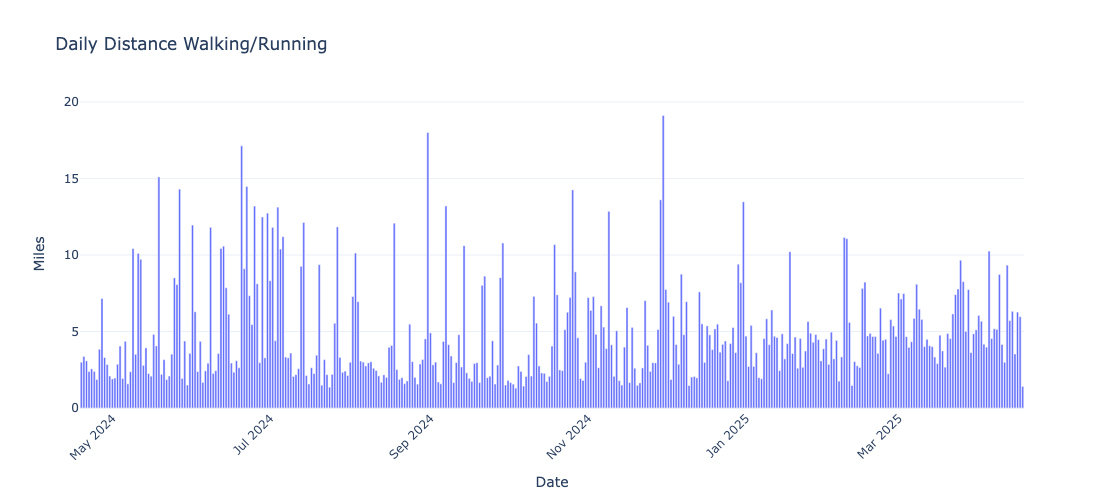

In [104]:
import plotly.graph_objects as go

fig = go.Figure()

# Add each metric as a bar trace
for metric in ['DistanceWalkingRunning']:
    fig.add_trace(go.Bar(
        x=distance_daily['date'],
        y=distance_daily['value'],
        name=metric
    ))

# Customize layout for stacked view
fig.update_layout(
    barmode='stack',
    title='Daily Distance Walking/Running',
    xaxis_title='Date',
    yaxis_title='Miles',
    legend_title='Metric',
    xaxis_tickangle=-45,
    template='plotly_white',
    height=500
)

fig.show()

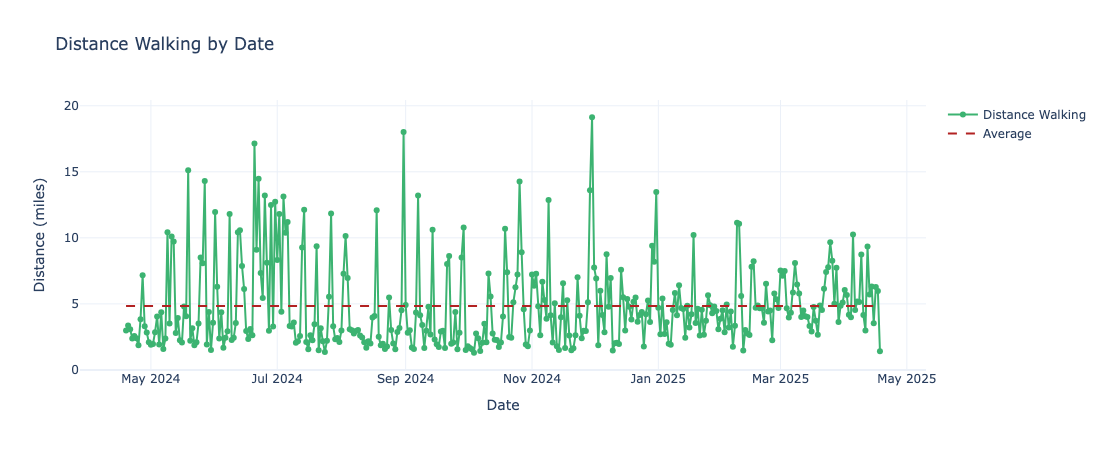

In [114]:
import plotly.graph_objects as go

# Calculate average distance
avg_distance = distance_daily['value'].mean()

# Plot
fig = go.Figure()

# Main line: Distance Walking
fig.add_trace(go.Scatter(
    x=distance_daily['date'],
    y=distance_daily['value'],
    mode='lines+markers',
    name='Distance Walking',
    line=dict(color='mediumseagreen'),
    hovertemplate='%{x|%b %d, %Y}<br>Distance: %{y:.2f} mi'
))

# Add average line
fig.add_trace(go.Scatter(
    x=[distance_daily['date'].min(), distance_daily['date'].max()],
    y=[avg_distance, avg_distance],
    mode='lines',
    name='Average',
    line=dict(color='firebrick', width=2, dash='dash'),
    hovertemplate='Average: %{y:.2f} mi<extra></extra>'
))

# Layout
fig.update_layout(
    title='Distance Walking by Date',
    xaxis_title='Date',
    yaxis_title='Distance (miles)',
    template='plotly_white',
    height=450
)

fig.show()